In [1]:
import numpy as np
def my_fft(x,n):
    if (n==1):
        return x
    wn=np.exp(-2j*np.pi/n)
    d=np.array([wn**i for i in range(n//2)])
    x_even=x[[2*i for i in range(n//2)]]
    x_odd=x[[2*i+1 for i in range(n//2)]]
    y_even=my_fft(x_even,n//2)
    y_odd=my_fft(x_odd,n//2)
    y_odd=np.multiply(d,y_odd)
    return np.concatenate([y_even+y_odd, y_even-y_odd])

In [2]:
#test correctness
test_x=np.random.normal(size=2**5)
error=np.fft.fft(test_x)-my_fft(test_x,2**5)
np.linalg.norm(error)

8.244106826421393e-15

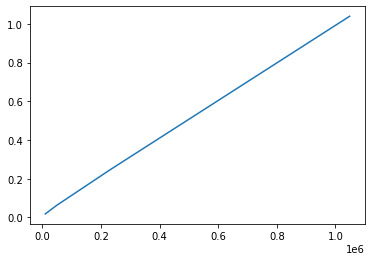

In [3]:
#test complexity
import matplotlib.pyplot as plt
import time
k=[10,12,14,16]
times=[]
for e in k:
    n=2**e
    test_x=np.random.normal(size=n)
    start = time.time()
    my_fft(test_x,n)
    end = time.time()
    times.append(end - start)
plt.plot([(2**e)*e for e in k ],times)
plt.show()